In [1]:
import sys
sys.path.append("/home/dictus/dmt/v2")
from neuro_dmt.library.users.hugo.validations import SimpleValidation

In [2]:
from dmt.model.interface import Interface
from seaborn import heatmap

class SynapsesPerConnectionAnalysis(SimpleValidation):
    
    class AdapterInterface(Interface):
        
        def get_synapses_per_connection(model, pre_mtype, post_mtype):
            """
            get the number of synapses per connection from the model
            for the pathway defined be pre and post mtype
            
            Arguments:
                model: the model to get the data from
                pre_mtype: string, the presynaptic mtype
                post_mtype: string, the postsynaptic mtype
            
            Returns:
                Array: number of synapses for each connection sampled
            """
            raise NotImplementedError
    
        def get_mtypes(model):
            """
            get all of the mytpes in the model
            Arguments:
               model: the model to get mtypes from
            
            Returns:
               iterable of mtypes (string)
            """
            raise NotImplementedError
    
    def get_measurement(self, model, by_query):
        """
        get the measurement from the model
        Arguments:
            by_query: dict with keys 'pre_mtype' and 'post_mtype'
        """
        return model.get_synapses_per_connection(**by_query)
    
    def measurements_parameters(self, model):
        mtypes = model.get_mtypes()
        return [{'pre_mtype': pre, 'post_mtype': post} for pre in mtypes for post in mtypes]
    
        
    def plot(self, labels, results_dataframes):
        label = labels[0]
        df = results_dataframes[0]
        df_matrix = df.pivot_table(index='pre_mtype', columns='post_mtype', values='mean')
        fig = heatmap(df_matrix)
        return fig
    

In [3]:
import numpy as np

class DummyAdapter:
    
    def get_synapses_per_connection(self, pre_mtype, post_mtype):
        return np.random.poisson(10, np.random.poisson(2000))
    
    def get_mtypes(self):
        return ['a', 'b', 'c', 'd', 'e', 'f']

In [4]:
DummyAdapter().get_synapses_per_connection('', '')


array([ 7,  6, 16, ..., 13, 14,  9])

/home/dictus/dmt/v2/neuro_dmt/library/users/hugo/validations/__init__.py:42: Warning: <__main__.SynapsesPerConnectionAnalysis object at 0x7f5a1c1849b0> does not have a phenomenon, defaulting to 'Not Provided'
  .format(self)))
/home/dictus/dmt/v2/neuro_dmt/library/users/hugo/validations/__init__.py:205: UserWarning: model number 0, <__main__.DummyAdapter object at 0x7f59e216a358> does not have label
  .format(i, model))


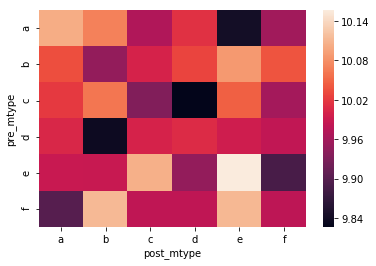

In [5]:
SynapsesPerConnectionAnalysis()(DummyAdapter())

In [7]:
from neuro_dmt.library.users.hugo.adapters import CircuitAdapter
SynapsesPerConnectionAnalysis()(CircuitAdapter("/gpfs/bbp.cscs.ch/project/proj1/circuits/SomatosensoryCxS1-v5.r0/O1/merged_circuit/CircuitConfig"))

/home/dictus/dmt/v2/neuro_dmt/library/users/hugo/validations/__init__.py:42: Warning: <__main__.SynapsesPerConnectionAnalysis object at 0x7f59b9fb9dd8> does not have a phenomenon, defaulting to 'Not Provided'
  .format(self)))


IndexError: list index out of range